In [1]:
import xarray as xr
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
# another_script.py
from file_finder import find_files_by_cycle_number,calculate_orbit_number,find_files_with_orbit_number2,find_files_by_cycle_number3
from file_finder import find_files_by_cycle_number4

In [2]:
# 使用示例
directory = r'D:\swot\v1.0\Basic'
cycle_number = 5
files = find_files_by_cycle_number(directory, cycle_number)

# 打印匹配的文件名的前5个
for file in files[:5]:
    print(file)

# 输出文件总数
print("文件总数:", len(files))


D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_001_20231012T163405_20231012T172531_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_002_20231012T172532_20231012T181658_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_003_20231012T181659_20231012T190825_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_004_20231012T190826_20231012T195952_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_005_20231012T195952_20231012T205119_v1.0.nc
文件总数: 582


D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_001_20230811T021853_20230811T031019_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_011_20230811T105321_20230811T114448_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_021_20230811T192749_20230811T201915_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_031_20230812T040217_20230812T045343_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_041_20230812T123646_20230812T132812_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_051_20230812T211114_20230812T220240_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_061_20230813T054542_20230813T063708_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_071_20230813T142010_20230813T151137_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_081_20230813T225439_20230813T234605_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_091_20230814T072907_20230814T082033_v1.0.nc
D:\swot\v1.0\Basic\c

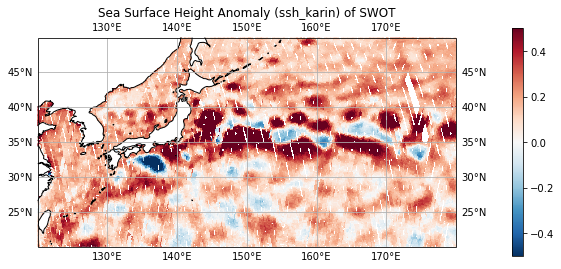

Wall time: 34 s


In [3]:
%%time
# 初始化绘图
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 定义黑潮区域的经纬度边界
lon_min, lon_max = 120, 180  # 东经120°到150°
lat_min, lat_max = 20, 50    # 北纬20°到40°
vmin, vmax = -0.5, 0.5  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# 文件路径
# base_path = r'C:\Users\yangleir\Downloads\swot\data\L3'
# files = sorted(os.listdir(base_path))  # 确保文件是按顺序排列的

counter = 0  # 初始化计数器
# 循环读取前100个文件
for file in files[0:]:
    file_path =  file
    
    try:
        
        data = xr.open_dataset(file_path)
        if counter % 10 == 0:  # 每隔5个文件打印一次
            print(file)
        
        counter += 1  # 更新计数器

        # 提取 'ssha' 变量并进行抽稀
        ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 10), num_pixels=slice(None, None, 10))

        ssh_karin = ssh_karin.where(
            (ssh_karin.longitude >= 0) & (ssh_karin.longitude <= 360) &
            (ssh_karin.latitude >= lat_min) & (ssh_karin.latitude <= lat_max),
            drop=True
        )

        # 绘制海平面高度到地图上
        ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto',vmin=vmin, vmax=vmax,  transform=ccrs.PlateCarree())
        data.close()  # 关闭文件，释放资源
    except (OSError, RuntimeError) as e:
        print(f"Skipping file {file} due to error: {e}")
        continue

# plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly(m)')
plt.colorbar(ssh_plot, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)

plt.title('Sea Surface Height Anomaly (ssh_karin) of SWOT')
plt.show()


D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_001_20231012T163405_20231012T172531_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_021_20231013T094302_20231013T103429_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_041_20231014T025158_20231014T034325_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_061_20231014T200055_20231014T205221_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_081_20231015T130951_20231015T140118_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_101_20231016T061848_20231016T071015_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_121_20231016T232744_20231017T001911_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_141_20231017T163641_20231017T172807_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_162_20231018T103704_20231018T112830_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_182_20231019T034601_20231019T043727_v1.0.nc
D:\swot\v1.0\Basic\c

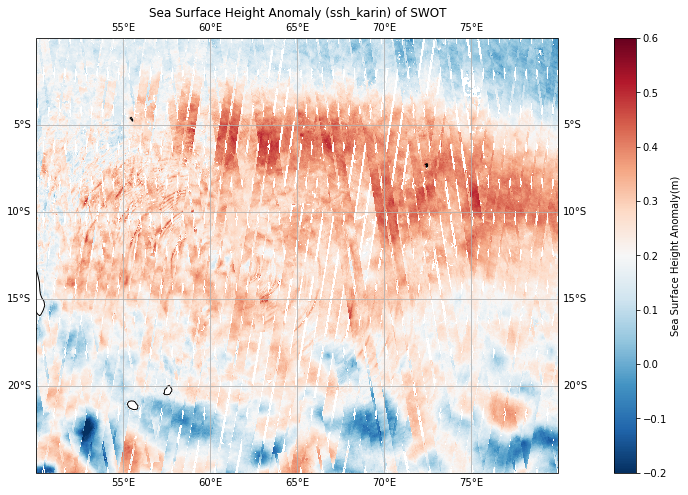

Wall time: 2min 17s


In [5]:
%%time

# 初始化绘图
plt.figure(figsize=(20, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 定义黑潮区域的经纬度边界
lon_min, lon_max = 50, 80  # 东经120°到150°
lat_min, lat_max = -25, 0    # 北纬20°到40°
vmin, vmax = -0.2, 0.6  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

counter = 0  # 初始化计数器
# 循环读取前100个文件
for file in files[0:]:  # 从第一个元素开始，步长为2
    # 进行你的文件处理操作
    # print(file)  # 或其他操作    
    file_path =  file
    
    try:
        
        data = xr.open_dataset(file_path)
        if counter % 20 == 0:  # 每隔5个文件打印一次
            print(file)
        
        counter += 1  # 更新计数器

        # 提取 'ssha' 变量并进行抽稀
        ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 1), num_pixels=slice(None, None, 1))

        ssh_karin = ssh_karin.where(
            (ssh_karin.longitude >= 0) & (ssh_karin.longitude <= 360) &
            (ssh_karin.latitude >= lat_min) & (ssh_karin.latitude <= lat_max),
            drop=True
        )

        # 绘制海平面高度到地图上
        ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto',vmin=vmin, vmax=vmax,  transform=ccrs.PlateCarree())
        data.close()  # 关闭文件，释放资源
        
    except (OSError, RuntimeError) as e:
        print(f"Skipping file {file} due to error: {e}")
        continue

plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly(m)',ax=ax)
plt.title('Sea Surface Height Anomaly (ssh_karin) of SWOT')
plt.show()


In [7]:
# 使用示例
orbit_number = 5
files = find_files_with_orbit_number2(directory, orbit_number)

# 打印匹配的文件名的前5个
for file in files[:5]:
    print(file)

# 输出文件总数
print("文件总数:", len(files))


D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_005_20230811T054440_20230811T063606_v1.0.nc
D:\swot\v1.0\Basic\cycle_003\SWOT_L3_LR_SSH_Basic_003_005_20230901T022945_20230901T032111_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_005_20231012T195952_20231012T205119_v1.0.nc
D:\swot\v1.0\Basic\cycle_006\SWOT_L3_LR_SSH_Basic_006_005_20231102T164458_20231102T173624_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_005_20231123T133003_20231123T142129_v1.0.nc
文件总数: 12


In [8]:
# 使用示例
cycle_number = 2
files = find_files_by_cycle_number3(directory, cycle_number)

# 打印匹配的文件名的前5个
for file in files[:5]:
    print(file)

# 输出文件总数
print("文件总数:", len(files))


D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_001_20230811T021853_20230811T031019_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_003_20230811T040146_20230811T045312_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_005_20230811T054440_20230811T063606_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_007_20230811T072733_20230811T081900_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_009_20230811T091027_20230811T100153_v1.0.nc
文件总数: 291


In [9]:
# 使用示例

cycle_number = 2
files = find_files_by_cycle_number4(directory, cycle_number)

# 打印匹配的文件名的前5个
for file in files[:5]:
    print(file)

# 输出文件总数
print("文件总数:", len(files))


D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_002_20230811T031019_20230811T040146_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_004_20230811T045313_20230811T054440_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_006_20230811T063607_20230811T072733_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_008_20230811T081900_20230811T091027_v1.0.nc
D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_010_20230811T100154_20230811T105320_v1.0.nc
文件总数: 291


In [10]:
orbit_number = calculate_orbit_number(319)

files = find_files_with_orbit_number2(directory, orbit_number)
# 打印匹配的文件名
for file in files:
    print(file)
# directory,orbit_number    

D:\swot\v1.0\Basic\cycle_002\SWOT_L3_LR_SSH_Basic_002_066_20230813T100256_20230813T105423_v1.0.nc
D:\swot\v1.0\Basic\cycle_003\SWOT_L3_LR_SSH_Basic_003_066_20230903T064802_20230903T073928_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_066_20231015T001809_20231015T010935_v1.0.nc
D:\swot\v1.0\Basic\cycle_006\SWOT_L3_LR_SSH_Basic_006_066_20231104T210314_20231104T215441_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_066_20231125T174820_20231125T183946_v1.0.nc
D:\swot\v1.0\Basic\cycle_008\SWOT_L3_LR_SSH_Basic_008_066_20231216T143323_20231216T152449_v1.0.nc
D:\swot\v1.0\Basic\cycle_009\SWOT_L3_LR_SSH_Basic_009_066_20240106T111830_20240106T120956_v1.0.nc
D:\swot\v1.0\Basic\cycle_010\SWOT_L3_LR_SSH_Basic_010_066_20240127T080336_20240127T085502_v1.0.nc
D:\swot\v1.0\Basic\cycle_011\SWOT_L3_LR_SSH_Basic_011_066_20240217T044841_20240217T054007_v1.0.nc
D:\swot\v1.0\Basic\cycle_012\SWOT_L3_LR_SSH_Basic_012_066_20240309T013344_20240309T022510_v1.0.nc
D:\swot\v1.0\Basic\c

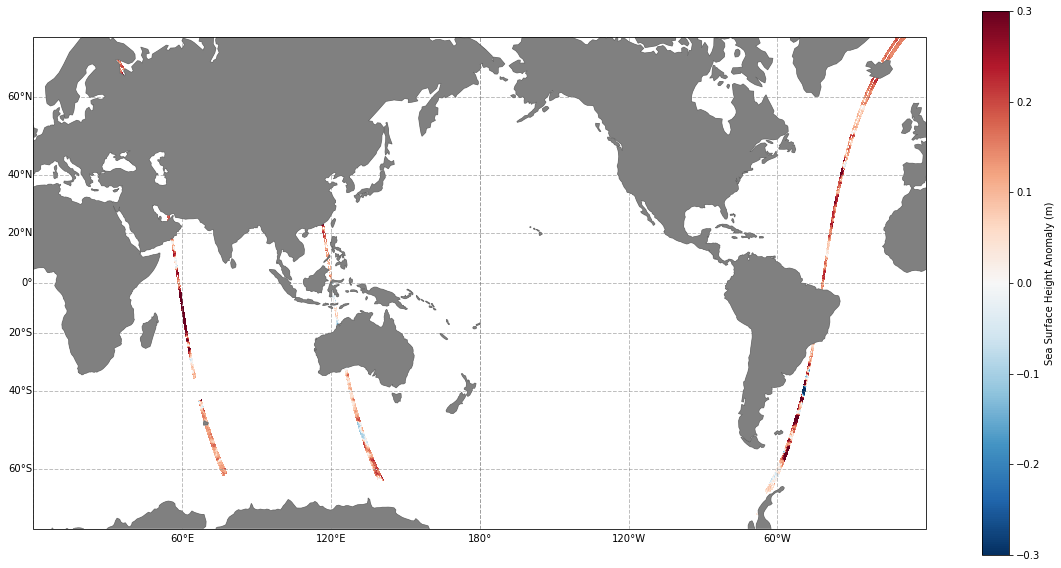

In [13]:
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import cmocean
import matplotlib.ticker as ticker

# 初始化绘图

fig, ax = plt.subplots(
    figsize=(20, 10), 
    subplot_kw={
        'projection': ccrs.Mercator(central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0,
                                   latitude_true_scale=0.0, globe=None)
    }
)

# 添加海岸线
ax.coastlines(resolution='110m', color='black', linewidth=0.1,zorder=3)

land_feature = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='face', facecolor='grey')
ax.add_feature(land_feature)

# 定义轨道号数组
orbit_numbers = [319,203,146] # 展示特定的轨道
vmin, vmax = -0.3, 0.3  # 假设的颜色条范围，根据数据进行调整


# 处理每个轨道号
for nu in orbit_numbers:
    transformed_orbit_number = calculate_orbit_number(nu)
    files = find_files_with_orbit_number2(directory, transformed_orbit_number)
    # print(files)
    if files:  # 检查是否找到了文件
        file_path = os.path.join(directory, files[3])  # 仅使用找到的第一个文件
        
        try:
            data = xr.open_dataset(file_path)
            # 提取 'ssha' 变量并进行抽稀
            ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 10), num_pixels=slice(None, None, 10))
            # 绘制海平面高度到地图上
            ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
            data.close()  # 关闭文件，释放资源

        except (OSError, RuntimeError) as e:
            print(f"Skipping file {file_path} due to error: {e}")

plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly (m)')
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False


plt.show()


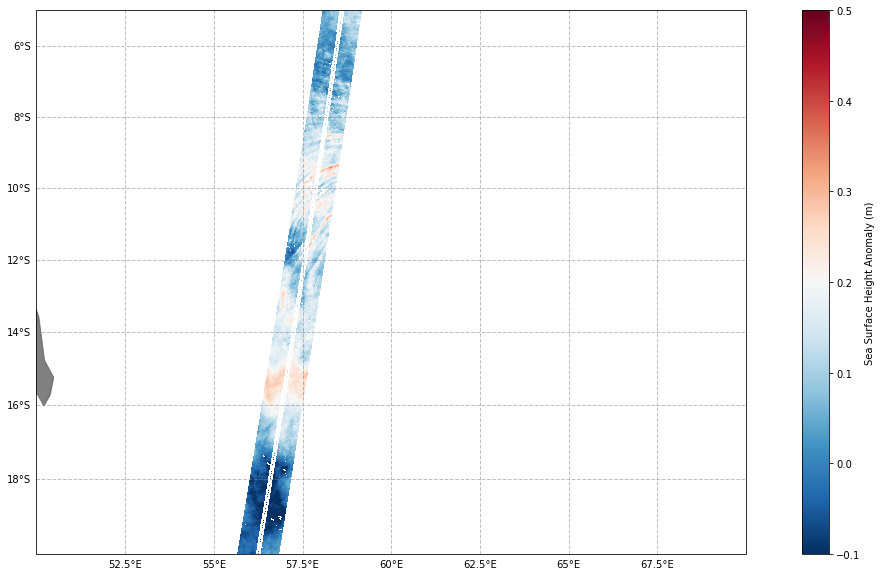

In [15]:
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import cmocean
# import matplotlib.ticker as ticker

# 初始化绘图

fig, ax = plt.subplots(
    figsize=(20, 10), 
    subplot_kw={
        'projection': ccrs.Mercator(central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0,
                                   latitude_true_scale=0.0, globe=None)
    }
)

# 添加海岸线
ax.coastlines(resolution='110m', color='black', linewidth=0.1,zorder=3)

land_feature = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='face', facecolor='grey')
ax.add_feature(land_feature)

# 定义轨道号数组
# orbit_numbers = [166,444,472,194,500,444,138,416,110,388,82,54,360]
orbit_numbers = [166]
# 定义黑潮区域的经纬度边界
lon_min, lon_max = 50, 70  # 东经120°到150°
lat_min, lat_max = -20, -5    # 北纬20°到40°

vmin, vmax = -0.1, 0.5  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())


# 处理每个轨道号
for nu in orbit_numbers:
    transformed_orbit_number = calculate_orbit_number(nu)
    files = find_files_with_orbit_number2(directory, transformed_orbit_number)
    # print(files)
    if files:  # 检查是否找到了文件
        file_path = os.path.join(directory, files[0])  # 仅使用找到的第一个文件
        
        try:
            data = xr.open_dataset(file_path)
            # 提取 'ssha' 变量并进行抽稀
            ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 1), num_pixels=slice(None, None, 1))
            longitude = data['longitude']
            latitude = data['latitude']
            
            # 首先，确保数据集的经纬度坐标符合预期范围
            valid_lon = (data['longitude'] >= lon_min) & (data['longitude'] <= lon_max)
            valid_lat = (data['latitude'] >= lat_min) & (data['latitude'] <= lat_max)

            # 只有当存在有效的经纬度数据时，才继续处理
            # 接下来，确保我们有有效的经纬度数据再进行进一步处理
            if valid_lon.any() and valid_lat.any():
                # 现在，我们可以安全地使用.where()方法来筛选数据
                ssh_karin_filtered = ssh_karin.where(
                    (longitude >= lon_min) & (longitude <= lon_max) &
                    (latitude >= lat_min) & (latitude <= lat_max),
                    drop=True
                )

                # 检查筛选后的数据是否包含任何有效数据点
                if ssh_karin_filtered.size > 0:
                    # 绘制海平面高度到地图上
                    ssh_plot = ax.pcolormesh(ssh_karin_filtered.longitude, ssh_karin_filtered.latitude, ssh_karin_filtered,
                                             cmap='RdBu_r', shading='auto', vmin=vmin, vmax=vmax,
                                             transform=ccrs.PlateCarree())
            # 绘制海平面高度到地图上
            # ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
            data.close()  # 关闭文件，释放资源

        except (OSError, RuntimeError) as e:
            print(f"Skipping file {file_path} due to error: {e}")

plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly (m)',ax=ax)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False


plt.show()


D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_001_20231012T163405_20231012T172531_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_021_20231013T094302_20231013T103429_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_041_20231014T025158_20231014T034325_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_061_20231014T200055_20231014T205221_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_081_20231015T130951_20231015T140118_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_101_20231016T061848_20231016T071015_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_121_20231016T232744_20231017T001911_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_141_20231017T163641_20231017T172807_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_161_20231018T094537_20231018T103703_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_181_20231019T025434_20231019T034600_v1.0.nc
D:\swot\v1.0\Basic\c

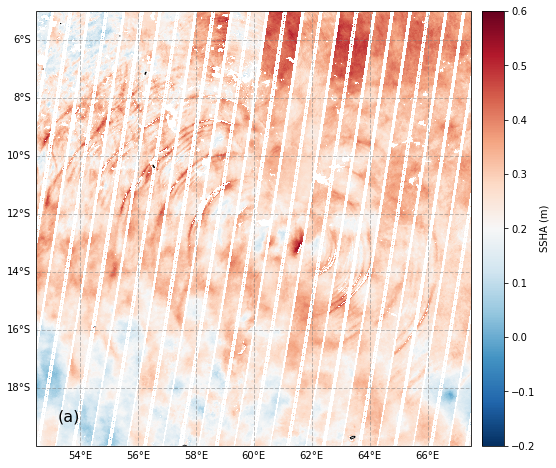

Wall time: 52.3 s


In [18]:
%%time

files = find_files_by_cycle_number3(directory, 5)

# 初始化绘图
plt.figure(figsize=(20, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# 定义经纬度边界
lon_min, lon_max = 52.5, 67.5  # 东经120°到150°
lat_min, lat_max = -20, -5    # 北纬20°到40°
vmin, vmax = -0.2, 0.6  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

counter = 0  # 初始化计数器
# 循环读取前100个文件
for file in files[0:]:  # 从第一个元素开始，步长为2
    # 进行你的文件处理操作
    # print(file)  # 或其他操作    
    file_path =  file
    
    try:
        
        data = xr.open_dataset(file_path)
        if counter % 10 == 0:  # 每隔5个文件打印一次
            print(file)
        
        counter += 1  # 更新计数器

        # 提取 'ssha' 变量并进行抽稀
        ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 1), num_pixels=slice(None, None, 1))

        ssh_karin = ssh_karin.where(
            (ssh_karin.longitude >= 0) & (ssh_karin.longitude <= 360) &
            (ssh_karin.latitude >= lat_min) & (ssh_karin.latitude <= lat_max),
            drop=True
        )

        # 绘制海平面高度到地图上
        ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto',vmin=vmin, vmax=vmax,  transform=ccrs.PlateCarree())
        data.close()  # 关闭文件，释放资源
        
    except (OSError, RuntimeError) as e:
        print(f"Skipping file {file} due to error: {e}")
        continue

# plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly(m)',ax=ax)
# 添加颜色条
cbar = plt.colorbar(ssh_plot, label='SSHA (m)', location='right', shrink=1, pad=0.01)
# 获取当前颜色条位置
pos = cbar.ax.get_position()
# 调整位置以向下移动颜色条，例如减少bottom的值
new_pos = [pos.x0, pos.y0 - 0.00, pos.width, pos.height]  # 这里的 0.1 可以根据需要调整
cbar.ax.set_position(new_pos)

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
plt.text(0.05, 0.05, '(a)', transform=plt.gca().transAxes, fontsize=16, va='bottom', ha='left')

# plt.title('Sea Surface Height Anomaly (ssh_karin) of SWOT')
plt.savefig('neibo.png', format='png', bbox_inches='tight')

plt.show()


In [23]:
%%time

files = find_files_by_cycle_number3(directory, 13)
# files = find_files_by_cycle_number3(directory, 14)

# 初始化绘图
plt.figure(figsize=(20, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# 定义经纬度边界
lon_min, lon_max = 123.5, 128.5  # 东经120°到150°
lat_min, lat_max = -8, -3    # 北纬20°到40°
vmin, vmax = -0.2, 0.45  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

counter = 0  # 初始化计数器
# 循环读取前100个文件
for file in files[0:]:  # 从第一个元素开始，步长为2
    # 进行你的文件处理操作
    file_path =  file
    
    try:
        
        data = xr.open_dataset(file_path)
        if counter % 20 == 0:  # 每隔5个文件打印一次
            print(file)
        
        counter += 1  # 更新计数器

        # 提取 'ssha' 变量并进行抽稀
        ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 1), num_pixels=slice(None, None, 1))

        ssh_karin = ssh_karin.where(
            (ssh_karin.longitude >= 0) & (ssh_karin.longitude <= 360) &
            (ssh_karin.latitude >= lat_min) & (ssh_karin.latitude <= lat_max),
            drop=True
        )

        # 绘制海平面高度到地图上
        ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto',vmin=vmin, vmax=vmax,  transform=ccrs.PlateCarree())
        data.close()  # 关闭文件，释放资源
        
    except (OSError, RuntimeError) as e:
        print(f"Skipping file {file} due to error: {e}")
        continue

# plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly(m)',ax=ax)
# 添加色标并指定位置
# 添加颜色条
cbar = plt.colorbar(ssh_plot, label='SSHA (m)', location='right', shrink=1, pad=0.01)
# 获取当前颜色条位置
pos = cbar.ax.get_position()
# 调整位置以向下移动颜色条，例如减少bottom的值
new_pos = [pos.x0, pos.y0 - 0.00, pos.width, pos.height]  # 这里的 0.1 可以根据需要调整
cbar.ax.set_position(new_pos)


gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
plt.text(0.05, 0.05, '(b)', transform=plt.gca().transAxes, fontsize=16, va='bottom', ha='left')

# plt.title('Sea Surface Height Anomaly (ssh_karin) of SWOT')
plt.savefig('neibo1.png', format='png', bbox_inches='tight')

plt.show()


D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_001_20240327T143444_20240327T152611_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_041_20240329T005237_20240329T014404_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_083_20240330T125324_20240330T134450_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_123_20240331T231117_20240401T000244_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_165_20240402T111203_20240402T120330_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_205_20240403T212956_20240403T222122_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_245_20240405T074748_20240405T083914_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_285_20240406T180541_20240406T185708_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_327_20240408T060628_20240408T065755_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_367_20240409T162422_20240409T171548_v1.0.nc
D:\swot\v1.0\Basic\c

Wall time: 59.4 s


D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_001_20231012T163405_20231012T172531_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_021_20231013T094302_20231013T103429_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_041_20231014T025158_20231014T034325_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_061_20231014T200055_20231014T205221_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_081_20231015T130951_20231015T140118_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_101_20231016T061848_20231016T071015_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_121_20231016T232744_20231017T001911_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_141_20231017T163641_20231017T172807_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_161_20231018T094537_20231018T103703_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_181_20231019T025434_20231019T034600_v1.0.nc
D:\swot\v1.0\Basic\c

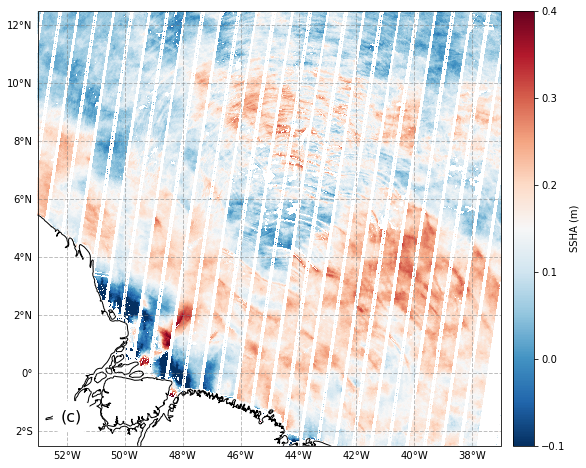

Wall time: 54.4 s


In [25]:
%%time

files = find_files_by_cycle_number3(directory, 5)

# 初始化绘图
plt.figure(figsize=(20, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# 定义黑潮区域的经纬度边界
lon_min, lon_max = 307, 323  # 东经120°到150°
lat_min, lat_max = -2.5, 12.5    # 北纬20°到40°
vmin, vmax = -0.1, 0.4  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

counter = 0  # 初始化计数器
# 循环读取前100个文件
for file in files[0:]:  # 从第一个元素开始，步长为2
    # 进行你的文件处理操作
    # print(file)  # 或其他操作    
    file_path =  file
    
    try:
        
        data = xr.open_dataset(file_path)
        if counter % 20 == 0:  # 每隔5个文件打印一次
            print(file)
        
        counter += 1  # 更新计数器

        # 提取 'ssha' 变量并进行抽稀
        ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 1), num_pixels=slice(None, None, 1))

        ssh_karin = ssh_karin.where(
            (ssh_karin.longitude >= 0) & (ssh_karin.longitude <= 360) &
            (ssh_karin.latitude >= lat_min) & (ssh_karin.latitude <= lat_max),
            drop=True
        )

        # 绘制海平面高度到地图上
        ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto',vmin=vmin, vmax=vmax,  transform=ccrs.PlateCarree())
        data.close()  # 关闭文件，释放资源
        
    except (OSError, RuntimeError) as e:
        print(f"Skipping file {file} due to error: {e}")
        continue

# plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly(m)',ax=ax)
# 添加色标并指定位置
# 添加颜色条
cbar = plt.colorbar(ssh_plot, label='SSHA (m)', location='right', shrink=1, pad=0.01)
# 获取当前颜色条位置
pos = cbar.ax.get_position()
# 调整位置以向下移动颜色条，例如减少bottom的值
new_pos = [pos.x0, pos.y0 - 0.00, pos.width, pos.height]  # 这里的 0.1 可以根据需要调整
cbar.ax.set_position(new_pos)


gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
plt.text(0.05, 0.05, '(c)', transform=plt.gca().transAxes, fontsize=16, 
         verticalalignment='bottom', horizontalalignment='left',
         bbox=dict(facecolor='white', edgecolor='none', alpha=1, boxstyle='round,pad=0.5'))

# plt.title('Sea Surface Height Anomaly (ssh_karin) of SWOT')
plt.savefig('neibo2.png', format='png', bbox_inches='tight')

plt.show()


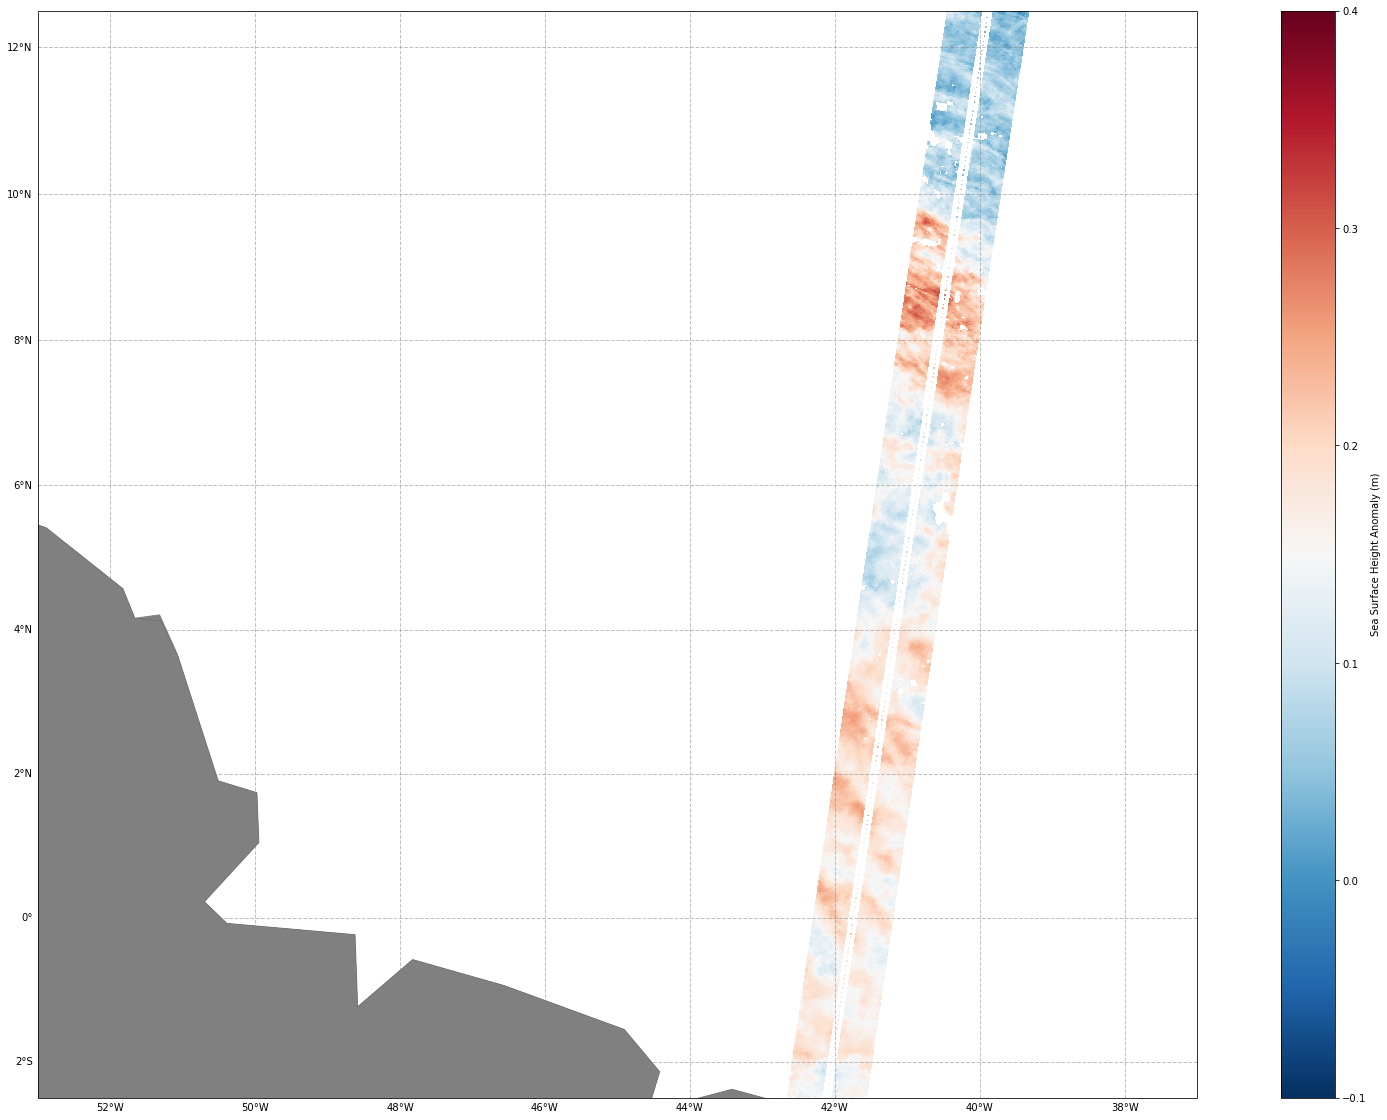

In [35]:
# 初始化绘图

fig, ax = plt.subplots(
    figsize=(30, 20), 
    subplot_kw={
        'projection': ccrs.Mercator(central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0,
                                   latitude_true_scale=0.0, globe=None)
    }
)

# 添加海岸线
ax.coastlines(resolution='110m', color='black', linewidth=0.1,zorder=3)

land_feature = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='face', facecolor='grey')
ax.add_feature(land_feature)

# 定义轨道号数组
orbit_numbers = [146]
# orbit_numbers = [202,508,480,147]

# 定义经纬度边界
lon_min, lon_max = 307, 323  # 东经120°到150°
lat_min, lat_max = -2.5, 12.5    # 北纬20°到40°
vmin, vmax = -0.1, 0.4  # 假设的颜色条范围，根据数据进行调整

# vmin, vmax = -0.1, 0.5  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())


# 处理每个轨道号
for nu in orbit_numbers:
    transformed_orbit_number = calculate_orbit_number(nu)
    files = find_files_with_orbit_number2(directory, transformed_orbit_number)
    # print(files)
    if files:  # 检查是否找到了文件
        file_path = os.path.join(directory, files[2])  # 仅使用找到的第一个文件
        
        try:
            data = xr.open_dataset(file_path)
            # 提取 'ssha' 变量并进行抽稀
            ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 1), num_pixels=slice(None, None, 1))
            longitude = data['longitude']
            latitude = data['latitude']
            
            # 首先，确保数据集的经纬度坐标符合预期范围
            valid_lon = (data['longitude'] >= lon_min) & (data['longitude'] <= lon_max)
            valid_lat = (data['latitude'] >= lat_min) & (data['latitude'] <= lat_max)

            # 只有当存在有效的经纬度数据时，才继续处理
            # 接下来，确保我们有有效的经纬度数据再进行进一步处理
            if valid_lon.any() and valid_lat.any():
                # 现在，我们可以安全地使用.where()方法来筛选数据
                ssh_karin_filtered = ssh_karin.where(
                    (longitude >= lon_min) & (longitude <= lon_max) &
                    (latitude >= lat_min) & (latitude <= lat_max),
                    drop=True
                )

                # 检查筛选后的数据是否包含任何有效数据点
                if ssh_karin_filtered.size > 0:
                    # 绘制海平面高度到地图上
                    ssh_plot = ax.pcolormesh(ssh_karin_filtered.longitude, ssh_karin_filtered.latitude, ssh_karin_filtered,
                                             cmap='RdBu_r', shading='auto', vmin=vmin, vmax=vmax,
                                             transform=ccrs.PlateCarree())
            # 绘制海平面高度到地图上
            # ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
            data.close()  # 关闭文件，释放资源

        except (OSError, RuntimeError) as e:
            print(f"Skipping file {file_path} due to error: {e}")

plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly (m)',ax=ax)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False


plt.show()


D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_001_20240327T143444_20240327T152611_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_041_20240329T005237_20240329T014404_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_083_20240330T125324_20240330T134450_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_123_20240331T231117_20240401T000244_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_165_20240402T111203_20240402T120330_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_205_20240403T212956_20240403T222122_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_245_20240405T074748_20240405T083914_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_285_20240406T180541_20240406T185708_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_327_20240408T060628_20240408T065755_v1.0.nc
D:\swot\v1.0\Basic\cycle_013\SWOT_L3_LR_SSH_Basic_013_367_20240409T162422_20240409T171548_v1.0.nc
D:\swot\v1.0\Basic\c

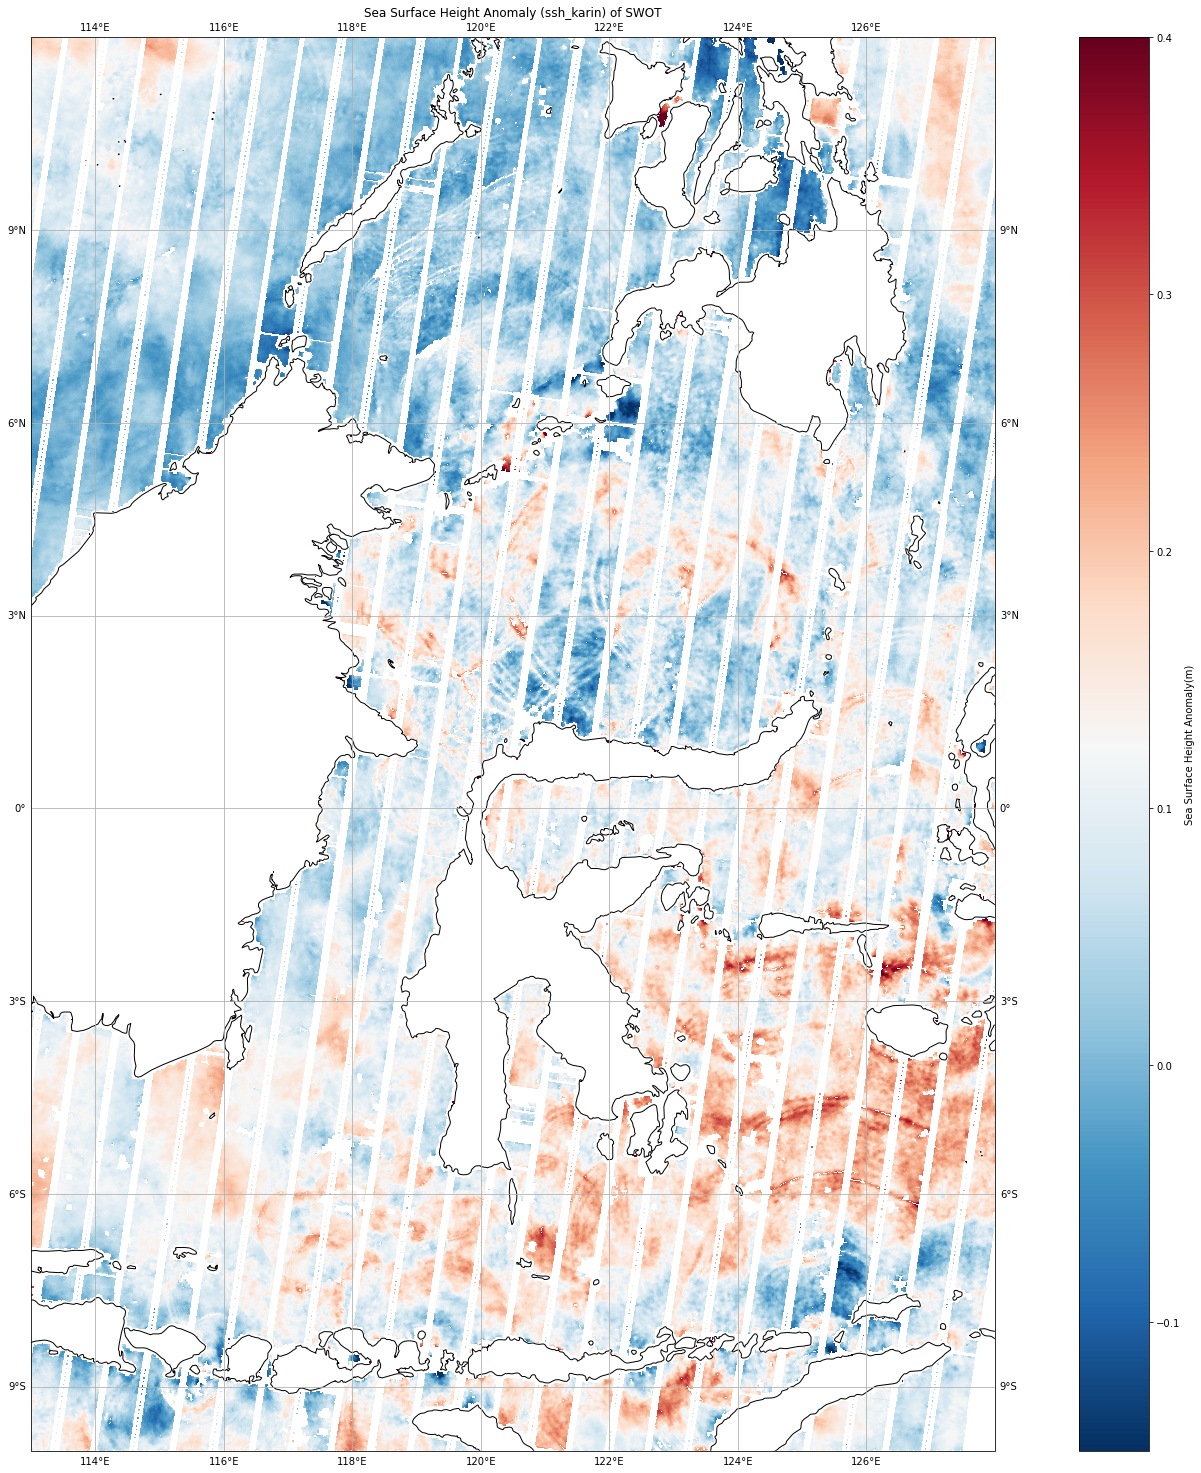

In [36]:
files = find_files_by_cycle_number3(directory, 13)

# 初始化绘图
plt.figure(figsize=(30, 26))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 定义经纬度边界
lon_min, lon_max = 113, 128  # 东经120°到150°
lat_min, lat_max = -10, 12    # 北纬20°到40°
vmin, vmax = -0.15, 0.4  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# 文件路径
# base_path = r'C:\Users\yangleir\Downloads\swot\data\L3'
# files = sorted(os.listdir(base_path))  # 确保文件是按顺序排列的

counter = 0  # 初始化计数器
# 循环读取前100个文件
for file in files[0:]:
    file_path =  file
    
    try:
        
        data = xr.open_dataset(file_path)
        if counter % 20 == 0:  # 每隔5个文件打印一次
            print(file)
        
        counter += 1  # 更新计数器

        # 提取 'ssha' 变量并进行抽稀
        ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 1), num_pixels=slice(None, None, 1))

        ssh_karin = ssh_karin.where(
            (ssh_karin.longitude >= 0) & (ssh_karin.longitude <= 360) &
            (ssh_karin.latitude >= lat_min) & (ssh_karin.latitude <= lat_max),
            drop=True
        )

        # 绘制海平面高度到地图上
        ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto',vmin=vmin, vmax=vmax,  transform=ccrs.PlateCarree())
        data.close()  # 关闭文件，释放资源
    except (OSError, RuntimeError) as e:
        print(f"Skipping file {file} due to error: {e}")
        continue

plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly(m)')
plt.title('Sea Surface Height Anomaly (ssh_karin) of SWOT')
plt.savefig('yinni.png')
plt.show()


D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_001_20231123T100416_20231123T105542_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_041_20231124T202209_20231124T211335_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_081_20231126T064002_20231126T073129_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_121_20231127T165755_20231127T174921_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_161_20231129T031548_20231129T040714_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_201_20231130T133341_20231130T142507_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_241_20231201T235134_20231202T004300_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_281_20231203T100927_20231203T110053_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_321_20231204T202720_20231204T211846_v1.0.nc
D:\swot\v1.0\Basic\cycle_007\SWOT_L3_LR_SSH_Basic_007_361_20231206T064512_20231206T073639_v1.0.nc
D:\swot\v1.0\Basic\c

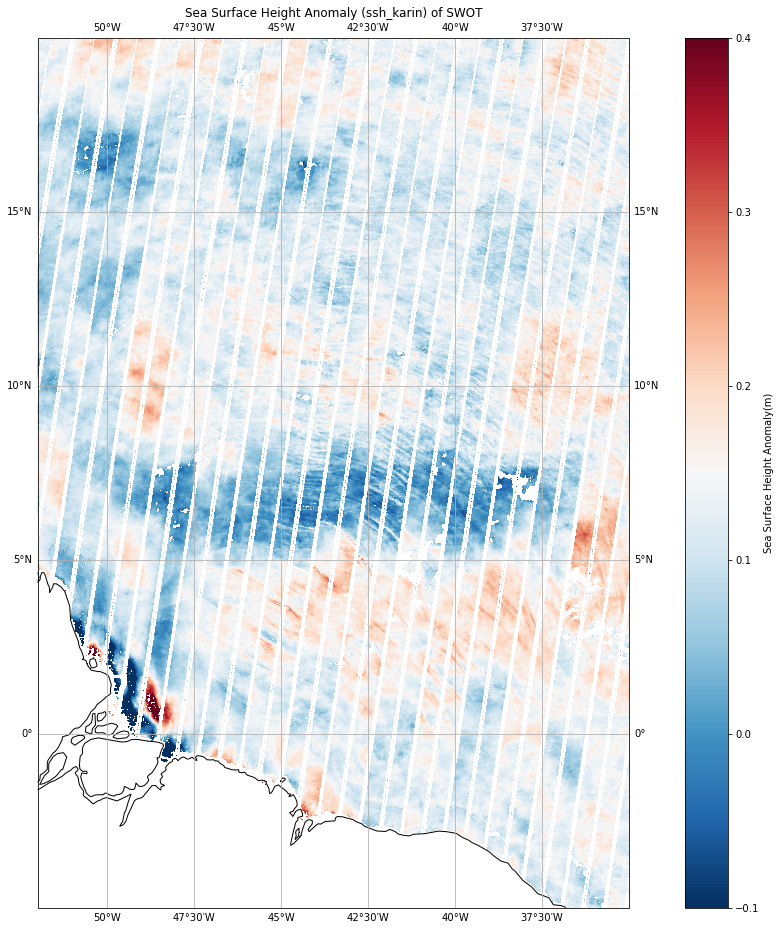

In [47]:
files = find_files_by_cycle_number3(directory, 7)

# 初始化绘图
plt.figure(figsize=(20, 16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 定义经纬度边界
lon_min, lon_max = 308, 325  # 东经120°到150°
lat_min, lat_max = -5, 20    # 北纬20°到40°
vmin, vmax = -0.1, 0.4  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# 文件路径
# base_path = r'C:\Users\yangleir\Downloads\swot\data\L3'
# files = sorted(os.listdir(base_path))  # 确保文件是按顺序排列的

counter = 0  # 初始化计数器
# 循环读取前100个文件
for file in files[0:]:
    file_path =  file
    
    try:
        
        data = xr.open_dataset(file_path)
        if counter % 20 == 0:  # 每隔5个文件打印一次
            print(file)
        
        counter += 1  # 更新计数器

        # 提取 'ssha' 变量并进行抽稀
        ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 1), num_pixels=slice(None, None, 1))

        ssh_karin = ssh_karin.where(
            (ssh_karin.longitude >= 0) & (ssh_karin.longitude <= 360) &
            (ssh_karin.latitude >= lat_min) & (ssh_karin.latitude <= lat_max),
            drop=True
        )

        # 绘制海平面高度到地图上
        ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto',vmin=vmin, vmax=vmax,  transform=ccrs.PlateCarree())
        data.close()  # 关闭文件，释放资源
    except (OSError, RuntimeError) as e:
        print(f"Skipping file {file} due to error: {e}")
        continue

plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly(m)')
plt.title('Sea Surface Height Anomaly (ssh_karin) of SWOT')
plt.savefig('baxi.png')
plt.show()


D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_001_20231012T163405_20231012T172531_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_041_20231014T025158_20231014T034325_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_081_20231015T130951_20231015T140118_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_121_20231016T232744_20231017T001911_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_161_20231018T094537_20231018T103703_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_201_20231019T200330_20231019T205456_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_241_20231021T062123_20231021T071249_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_281_20231022T163916_20231022T173042_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_321_20231024T025709_20231024T034835_v1.0.nc
D:\swot\v1.0\Basic\cycle_005\SWOT_L3_LR_SSH_Basic_005_361_20231025T131502_20231025T140628_v1.0.nc
D:\swot\v1.0\Basic\c

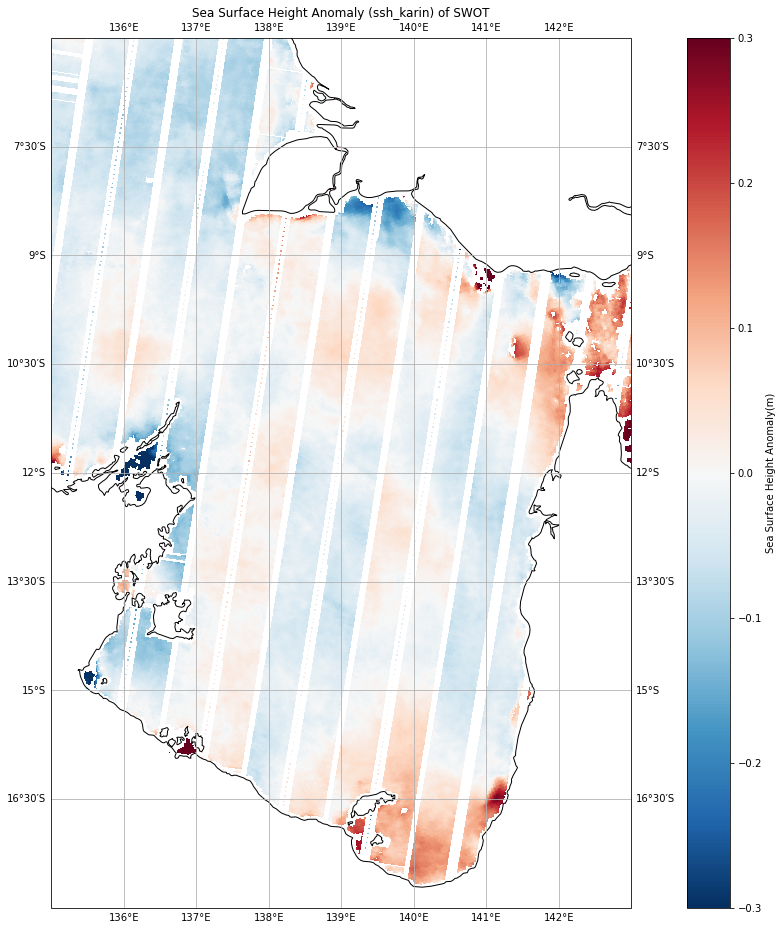

In [46]:
# 初始化绘图
plt.figure(figsize=(20, 16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 定义经纬度边界
lon_min, lon_max = 135.0, 143  # 东经120°到150°
lat_min, lat_max = -18, -6    # 北纬20°到40°

vmin, vmax = -0.3, 0.3  # 假设的颜色条范围，根据数据进行调整

# 设置地图显示的区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

counter = 0  # 初始化计数器
# 循环读取前100个文件
for file in files[0:]:
    file_path =  file
    
    try:
        
        data = xr.open_dataset(file_path)
        if counter % 20 == 0:  # 每隔5个文件打印一次
            print(file)
        
        counter += 1  # 更新计数器

        # 提取 'ssha' 变量并进行抽稀
        ssh_karin = data['ssha'].isel(num_lines=slice(None, None, 1), num_pixels=slice(None, None, 1))

        ssh_karin = ssh_karin.where(
            (ssh_karin.longitude >= 0) & (ssh_karin.longitude <= 360) &
            (ssh_karin.latitude >= lat_min) & (ssh_karin.latitude <= lat_max),
            drop=True
        )

        # 绘制海平面高度到地图上
        ssh_plot = plt.pcolormesh(ssh_karin.longitude, ssh_karin.latitude, ssh_karin, cmap='RdBu_r', shading='auto',vmin=vmin, vmax=vmax,  transform=ccrs.PlateCarree())
        data.close()  # 关闭文件，释放资源
    except (OSError, RuntimeError) as e:
        print(f"Skipping file {file} due to error: {e}")
        continue

plt.colorbar(ssh_plot, label='Sea Surface Height Anomaly(m)')
plt.title('Sea Surface Height Anomaly (ssh_karin) of SWOT')
plt.savefig('yinnipendi.png')
plt.show()
